### Importing the libraries

In [ ]:
import os
import pandas as pd
import  numpy as np
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Preparation

In [ ]:
# Directory containing the data
data_directory = "/kaggle/input/datasettaskmariam/dataset/data"

# Initialize empty lists to store labels and image paths
labels = []
image_paths = []

# Loop through each folder in the data directory
for folder_name in os.listdir(data_directory):
    # Get the full path of the folder
    folder_path = os.path.join(data_directory, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Extract label from folder name
        label = folder_name

        # Loop through each image file in the folder
        for file_name in os.listdir(folder_path):
            # Get the full path of the image file
            image_path = os.path.join(folder_path, file_name)

            # Append label and image path to lists
            labels.append(label)
            image_paths.append(image_path)

# Create a DataFrame from the lists
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Display the DataFrame
print(df.head())


                                          image_path       label
0  /kaggle/input/datasettaskmariam/dataset/data/S...  Stationary
1  /kaggle/input/datasettaskmariam/dataset/data/S...  Stationary
2  /kaggle/input/datasettaskmariam/dataset/data/S...  Stationary
3  /kaggle/input/datasettaskmariam/dataset/data/S...  Stationary
4  /kaggle/input/datasettaskmariam/dataset/data/S...  Stationary


In [ ]:
df

,image_path,label
0,/kaggle/input/datasettaskmariam/dataset/data/S...,Stationary
1,/kaggle/input/datasettaskmariam/dataset/data/S...,Stationary
2,/kaggle/input/datasettaskmariam/dataset/data/S...,Stationary
3,/kaggle/input/datasettaskmariam/dataset/data/S...,Stationary
4,/kaggle/input/datasettaskmariam/dataset/data/S...,Stationary
...,...,...
247,/kaggle/input/datasettaskmariam/dataset/data/a...,accessories
248,/kaggle/input/datasettaskmariam/dataset/data/a...,accessories
249,/kaggle/input/datasettaskmariam/dataset/data/a...,accessories
250,/kaggle/input/datasettaskmariam/dataset/data/a...,accessories


In [ ]:
df['label'].unique()

array(['Stationary', 'fashion', 'games', 'home', 'accessories'],
      dtype=object)

In [ ]:
# Define the target size for resizing
target_size = (224, 224)

# Create a list to store resized images and their corresponding labels
resized_images = []
labels = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    try:
        # Read the image using skimage
        img = io.imread(row['image_path'])

        # Resize the image using skimage.transform
        resized_img = transform.resize(img, target_size)

        # Append the resized image and its label to the lists
        resized_images.append(resized_img.flatten())
        labels.append(row['label'])
    except Exception as e:
        print(f"Error processing image at path {row['image_path']}: {e}")

# Convert the lists to NumPy arrays
resized_images = np.array(resized_images)
labels = np.array(labels)

# Print the shapes of the resized images array and labels array
print("Resized images shape:", resized_images.shape)
print("Labels shape:", labels.shape)


Resized images shape: (252, 150528)
Labels shape: (252,)


**Data visualization**

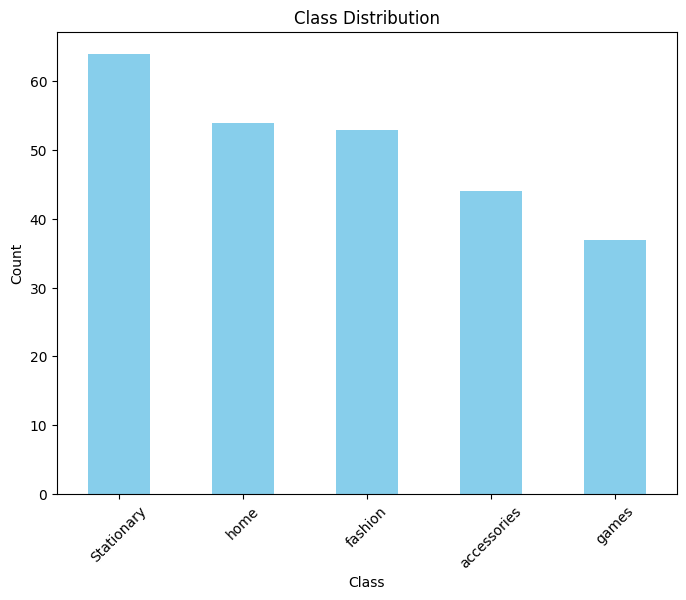

In [ ]:
# Plot class distribution
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Model Building

**Training**

splitting the data into trainig and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(resized_images,labels,test_size=0.2,shuffle=True ,stratify=labels)

Trying RandomForest classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

testing randomforest classifier and evaluate the performance

In [ ]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9803921568627451
Classification Report:
              precision    recall  f1-score   support

  Stationary       1.00      1.00      1.00        13
 accessories       1.00      1.00      1.00         9
     fashion       1.00      0.91      0.95        11
       games       1.00      1.00      1.00         7
        home       0.92      1.00      0.96        11

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Confusion Matrix:
[[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0 10  0  1]
 [ 0  0  0  7  0]
 [ 0  0  0  0 11]]


i see this model is get overfitted with data so i could try another classifier

Trying support vector machine classifier

In [ ]:
classifier = SVC()

parameters=[{'gamma':[0.01,0.001],'C':[1,10,100]}]



GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'gamma': [0.01, 0.001]}])

**Fine Tuning** :



grid search is a fine-tuning method used to systematically explore and optimize hyperparameter settings for machine learning models.

In [ ]:

grid_search=GridSearchCV(classifier,parameters)

grid_search.fit(X_train,y_train)

Testing step and evaluate the performance of classifier


In [ ]:
best_estimator=grid_search.best_estimator_
y_prediction = best_estimator.predict(X_test)
score=accuracy_score(y_prediction,y_test)
print('{}% of samples were correctly classified'.format(str(score * 100)))

50.98039215686274% of samples were correctly classified


i see the classifier is underfitted with the data

Building another model for svm using different parameters

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

  Stationary       1.00      1.00      1.00        13
 accessories       0.50      0.33      0.40         9
     fashion       0.67      0.55      0.60        11
       games       0.80      0.57      0.67         7
        home       0.44      0.73      0.55        11

    accuracy                           0.67        51
   macro avg       0.68      0.64      0.64        51
weighted avg       0.69      0.67      0.67        51

Confusion Matrix:
[[13  0  0  0  0]
 [ 0  3  2  1  3]
 [ 0  0  6  0  5]
 [ 0  1  0  4  2]
 [ 0  2  1  0  8]]


the accuracy is good and the model goodfitted with data  

Now testing this model  

In [ ]:
# Load and preprocess the test image
test_image_path = '/kaggle/input/datasettaskmariam/dataset/data/Stationary/Screenshot_20240312_204239.jpg'  # Replace with the path to your test image
test_image = io.imread(test_image_path)  # Load the image
# Preprocess the image (resize, normalize, etc.)
# Make sure to preprocess the image in the same way as your training data

# Resize the image to match the dimensions of the training images
# Replace `target_size` with the dimensions of your training images
target_size = (224, 224)  # Replace with the dimensions of your training images
test_image_resized = transform.resize(test_image, target_size)

# Flatten the image to create a feature vector
test_image_feature_vector = test_image_resized.flatten()

# Pass the feature vector to the trained SVM classifier for prediction
predicted_label = svm_classifier.predict(test_image_feature_vector.reshape(1, -1))

print("Predicted label:", predicted_label)



Predicted label: ['Stationary']


**Try using crossvalidation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.63414634 0.675      0.55       0.65       0.6       ]
Mean Accuracy: 0.6218292682926829


In [ ]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the classifier on the training set
svm_classifier.fit(X_train_split, y_train_split)

# Evaluate the performance of the classifier on the validation set
y_val_pred = svm_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.5121951219512195


Another try qnd aother way for gridsearch to get the best parameters


In [ ]:
# Define the grid of hyperparameters
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}


In [ ]:
# Get the best estimator from grid search
best_svm_classifier = grid_search.best_estimator_

# Retrain the classifier on the entire training set with the best hyperparameters
best_svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set using the retrained classifier
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy with Best Hyperparameters: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

  Stationary       1.00      1.00      1.00        13
 accessories       0.40      0.22      0.29         9
     fashion       0.60      0.55      0.57        11
       games       0.80      0.57      0.67         7
        home       0.50      0.82      0.62        11

    accuracy                           0.67        51
   macro avg       0.66      0.63      0.63        51
weighted avg       0.67      0.67      0.65        51

Confusion Matrix:
[[13  0  0  0  0]
 [ 0  2  3  0  4]
 [ 0  1  6  1  3]
 [ 0  1  0  4  2]
 [ 0  1  1  0  9]]
